# Forest Fire Detection using CNN

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Forest Fire Dataset\Training", target_size = (250,250),batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("Forest Fire Dataset\Testing", target_size = (250,250),batch_size = 32, class_mode = 'binary')

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [3]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
#creating the CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(250,250,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [8]:
!pip install visualkeras

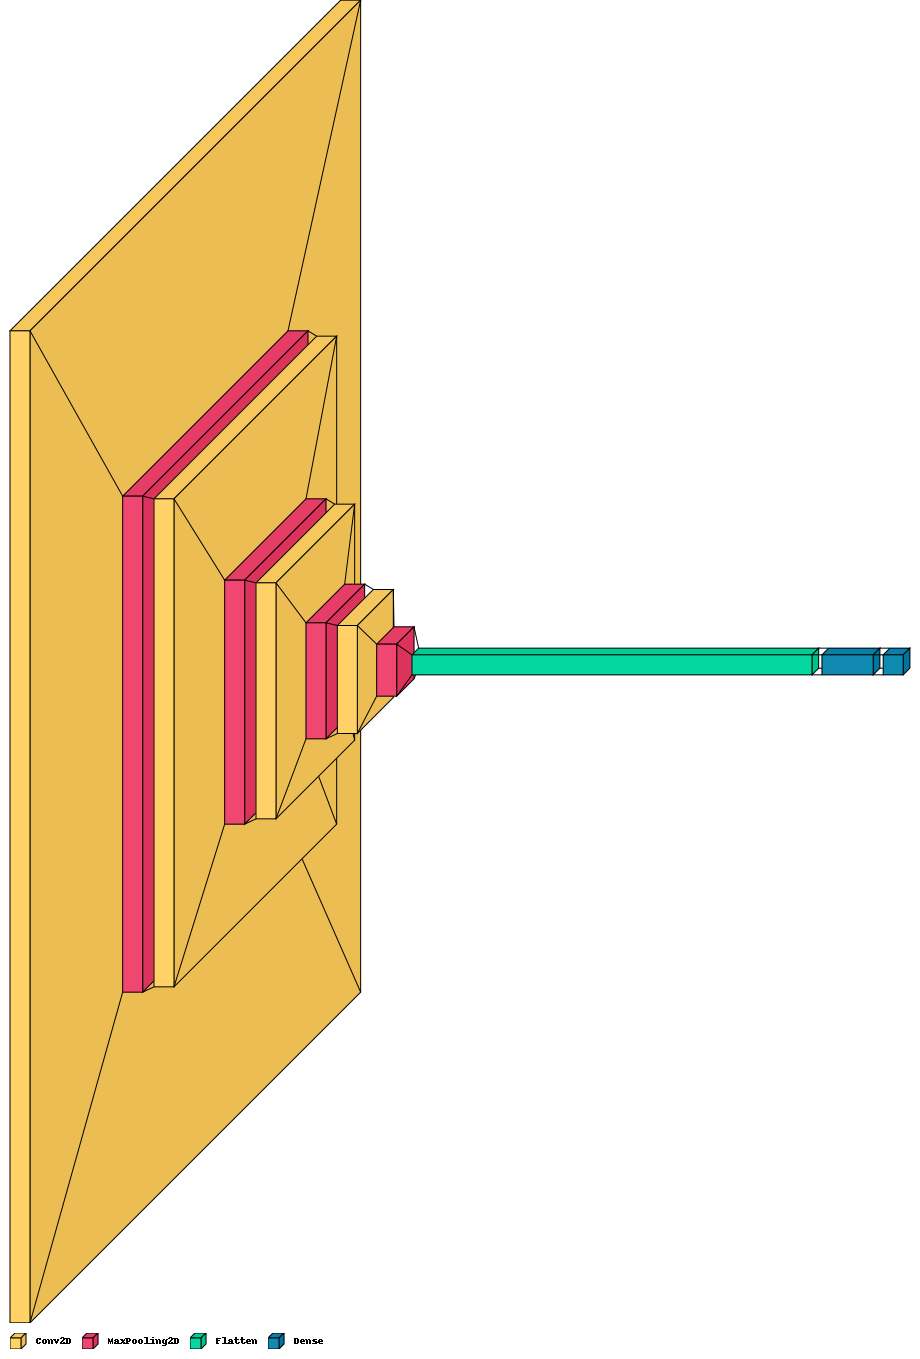

In [9]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [7]:
#model fit
r = model.fit(train_dataset,epochs=7,validation_data=test_dataset)

Epoch 1/7
48/48 [==============================] - 145s 3s/step - loss: 0.4068 - accuracy: 0.8737 - val_loss: 0.2244 - val_accuracy: 0.9368
Epoch 2/7
48/48 [==============================] - 132s 3s/step - loss: 0.2009 - accuracy: 0.9349 - val_loss: 0.1588 - val_accuracy: 0.9447
Epoch 3/7
48/48 [==============================] - 151s 3s/step - loss: 0.1435 - accuracy: 0.9539 - val_loss: 0.1472 - val_accuracy: 0.9395
Epoch 4/7
48/48 [==============================] - 146s 3s/step - loss: 0.1312 - accuracy: 0.9572 - val_loss: 0.1497 - val_accuracy: 0.9500
Epoch 5/7
48/48 [==============================] - 143s 3s/step - loss: 0.1208 - accuracy: 0.9553 - val_loss: 0.0984 - val_accuracy: 0.9579
Epoch 6/7
48/48 [==============================] - 131s 3s/step - loss: 0.1060 - accuracy: 0.9711 - val_loss: 0.1705 - val_accuracy: 0.9421
Epoch 7/7
48/48 [==============================] - 131s 3s/step - loss: 0.0835 - accuracy: 0.9704 - val_loss: 0.1447 - val_accuracy: 0.9474


In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

12/12 [==============================] - 8s 639ms/step


### Train score evaluation

In [9]:
batch_size=32
train_score = model.evaluate(train_dataset, batch_size=batch_size)
print("Training accuracy: {:.2f}%".format(train_score[1] * 100))
print("Training Loss: ", train_score[0])

48/48 [==============================] - 31s 640ms/step - loss: 0.0797 - accuracy: 0.9737
Training accuracy: 97.37%
Training Loss:  0.07974609732627869


### Test score evaluation

In [11]:
test_score = model.evaluate(test_dataset, batch_size=batch_size)
print("Accuracy: {:.2f}%".format(test_score[1] * 100))
print("Loss: ",test_score[0])

12/12 [==============================] - 8s 648ms/step - loss: 0.1447 - accuracy: 0.9474
Accuracy: 94.74%
Loss:  0.14471212029457092


### Plotting Loss and accuracy 

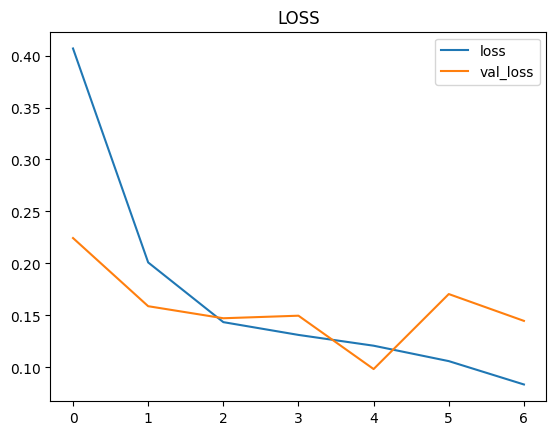

In [12]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("LOSS")
plt.legend();

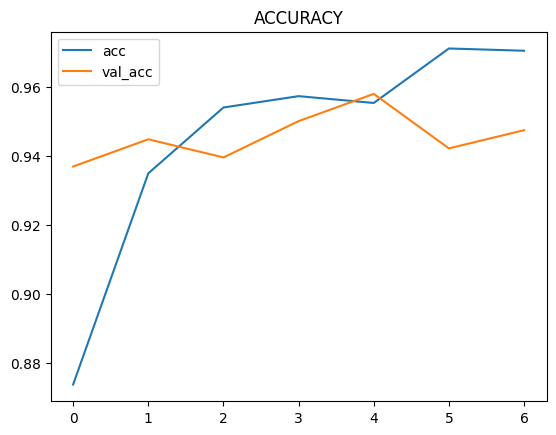

In [13]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.title("ACCURACY")
plt.legend();

## Classifying 10 images whether they are fire or no fire images and also plotted heatmap for each image with the IOU and dice coefficient metrics.

In [14]:
import os
test_path1=r"Forest Fire Dataset\Testing\fire"
files1=os.listdir(test_path1)

In [15]:
test_path2=r"Forest Fire Dataset\Testing\nofire"
files2=os.listdir(test_path2)

In [16]:
# Combine files1 and files2 to test images
images=files1+files2
import random
test_images = random.sample( images, len(images) )
test_images[:5]

['fire_0097.jpg',
 'fire_0921.jpg',
 'nofire_0800.jpg',
 'nofire_0943.jpg',
 'fire_0271.jpg']

In [17]:
def ObjectDetection(path):
    img=cv2.imread(path)
    
    # obtained a binary image after performing binary threshold on the a-channel of the LAB converted image
    lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    a_component=lab[:,:,1]
    threshold=cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]
    
    #Applying Gaussian Blur filter
    blur = cv2.GaussianBlur(threshold,(13,13), 11)

    #Applying heatmap on blur image.
    heatmap_img = cv2.applyColorMap(blur,cv2.COLORMAP_JET)

    #Superimposing heatmap on the original image.
    superimposed_heatmap=cv2.addWeighted(heatmap_img,0.5,img,0.5,0)
    return superimposed_heatmap

In [26]:
def manual_annotation(original_image):
    # Manually annotate ground truth labels
    ground_truth_labels = np.zeros(original_image.shape[:2], dtype=np.uint8)
    ground_truth_labels[100:200, 100:200] = 1  # Example: Assign label 1 to a region
    return ground_truth_labels

def calculate_iou(gt_labels, pred_labels):
    intersection = np.logical_and(gt_labels, pred_labels)
    union = np.logical_or(gt_labels, pred_labels)
    iou = np.sum(intersection) / np.sum(union)
    return iou


def calculate_dice_coefficient(gt_labels, pred_labels):
    intersection = np.logical_and(gt_labels, pred_labels)
    dice_coefficient = 2 * np.sum(intersection) / (np.sum(gt_labels) + np.sum(pred_labels))
    return dice_coefficient

In [22]:
#Take images and check results on it.
import cv2
import seaborn as sns

def predictImage(filename):
    img = image.load_img(filename,target_size=(250,250))
    superimposed_image=ObjectDetection(filename)
   
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(6,6))
    ax1.imshow(img)
    ax2.imshow(superimposed_image)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    ax1.set_title("Original Image")
    ax2.set_title("Superimposed Heatmap")
    if(val == 1):
        ax1.set_xlabel("No Fire",fontsize=30)
    elif(val==0):
        ax1.set_xlabel("Fire",fontsize=30)
    plt.show()
    
    # Extract the heatmap region by masking out the non-heatmap pixels
    heatmap_region = superimposed_image.copy()
    heatmap_region[heatmap_region < 128] = 0  # Threshold to extract heatmap pixels

    # Convert the heatmap region to binary image
    heatmap_region_binary = cv2.cvtColor(heatmap_region, cv2.COLOR_BGR2GRAY)
    heatmap_region_binary = np.where(heatmap_region_binary > 0, 1, 0)
    # Extract ground truth labels (e.g., using annotations or thresholding)
    ground_truth_labels = manual_annotation(superimposed_image)
    # Binarize the ground truth labels for the heatmap region
    ground_truth_labels_binary = np.where(ground_truth_labels > 0, 1, 0)
   
    # Calculate IoU and Dice Coefficient for the heatmap region
    iou = calculate_iou(ground_truth_labels_binary, heatmap_region_binary)
    dice_coefficient = calculate_dice_coefficient(ground_truth_labels_binary, heatmap_region_binary)

    print(f"IoU for heatmap region: {iou}")
    print(f"Dice Coefficient for heatmap region: {dice_coefficient}")

In [23]:
path=[]
#path=os.path.join("Forest Fire Dataset\Training",test_images)
for p in test_images:
    p_img=p.split('_')
    if "fire" in p_img:
        path.append(os.path.join(r"Forest Fire Dataset\Testing","fire",p))
    else:
        path.append(os.path.join(r"Forest Fire Dataset\Testing\nofire",p))
path[:10]   

['Forest Fire Dataset\\Testing\\fire\\fire_0097.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0921.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0800.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0943.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0271.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0112.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0098.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0863.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0349.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0856.jpg']

1/1 [==============================] - 0s 53ms/step


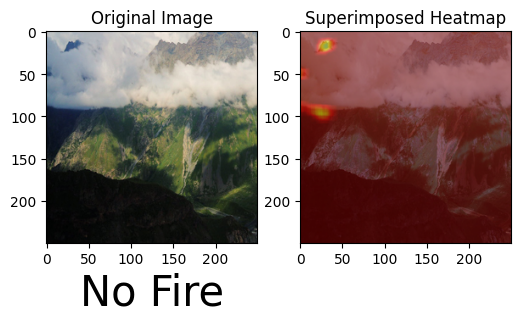

IoU for heatmap region: 0.0063465783664459164
Dice Coefficient for heatmap region: 0.012613106663010694
1/1 [==============================] - 0s 50ms/step


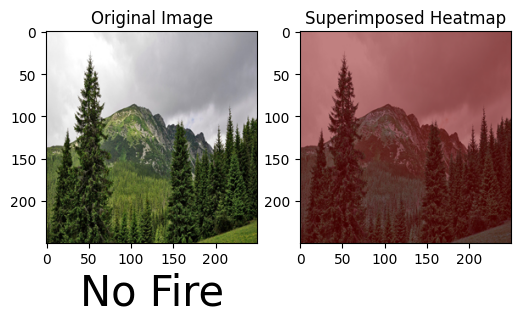

IoU for heatmap region: 0.039395800759437126
Dice Coefficient for heatmap region: 0.07580519515405486
1/1 [==============================] - 0s 49ms/step


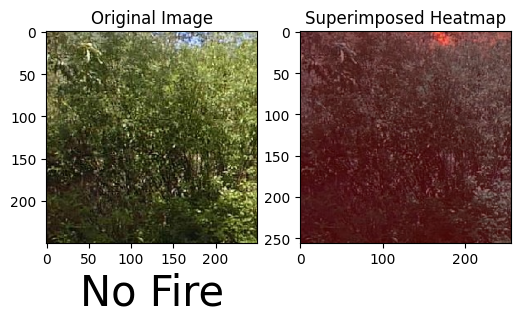

IoU for heatmap region: 0.012165269638750835
Dice Coefficient for heatmap region: 0.024038109197508244
1/1 [==============================] - 0s 53ms/step


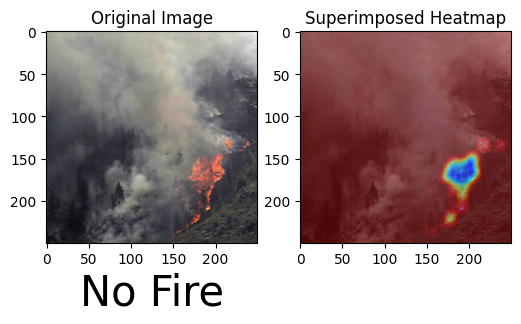

IoU for heatmap region: 0.15733524635601787
Dice Coefficient for heatmap region: 0.2718922574101206
1/1 [==============================] - 0s 55ms/step


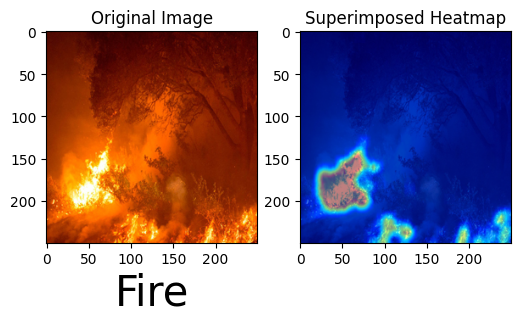

IoU for heatmap region: 0.22564580624586023
Dice Coefficient for heatmap region: 0.36820720161726145
1/1 [==============================] - 0s 61ms/step


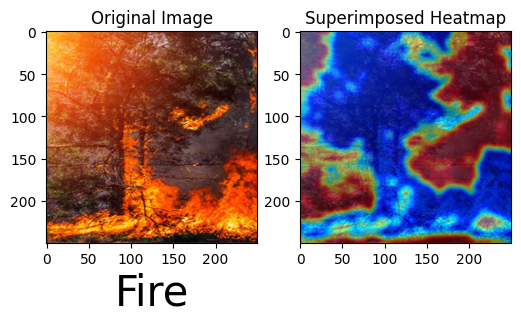

IoU for heatmap region: 0.15641884695082983
Dice Coefficient for heatmap region: 0.27052282546806444
1/1 [==============================] - 0s 43ms/step


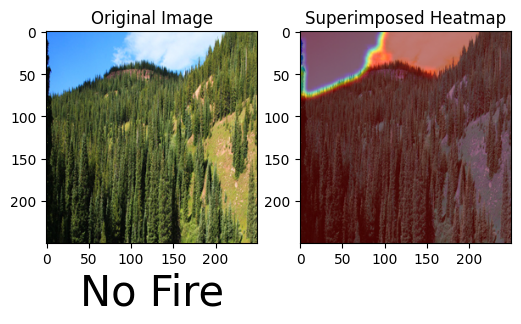

IoU for heatmap region: 0.0019404915912031048
Dice Coefficient for heatmap region: 0.003873466752743706
1/1 [==============================] - 0s 48ms/step


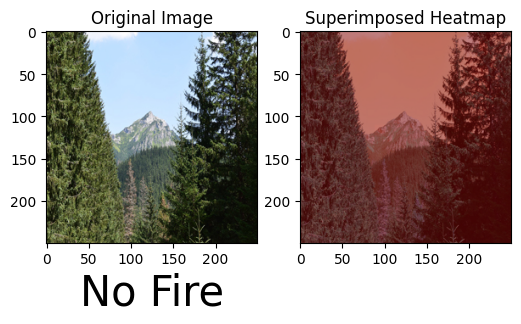

IoU for heatmap region: 0.10079544105425621
Dice Coefficient for heatmap region: 0.18313201035375323
1/1 [==============================] - 0s 67ms/step


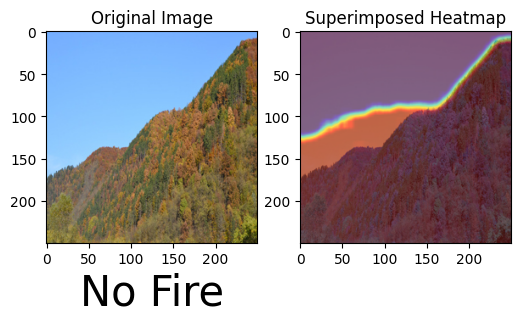

IoU for heatmap region: 0.013137260703612747
Dice Coefficient for heatmap region: 0.02593382202622587
1/1 [==============================] - 0s 50ms/step


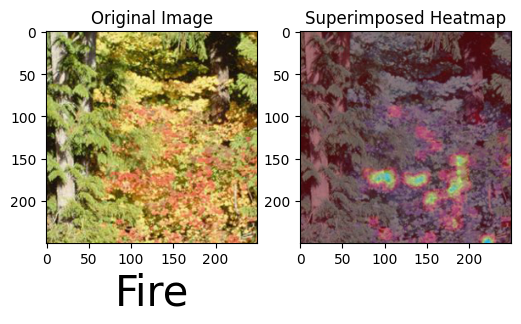

IoU for heatmap region: 0.2242234403549987
Dice Coefficient for heatmap region: 0.36631130063965883


In [27]:
import numpy as np
img_path=r""
for i in range(10,20):
    img_path=path[i]
    predictImage(img_path)